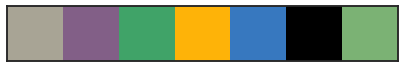

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
import statsmodels.formula.api as smf
from pprint import pprint
import re as re

from statsmodels.regression.mixed_linear_model import MixedLMResults

import scipy as sp
#from scipy.stats import nanmean
#from scipy.stats import nanstd
import copy
import scipy.stats as stats
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pprint import pprint
import seaborn as sns
sns.set(style="white", context="talk")
custom_palette = [ "greyish", "dusty purple", "greenish", "amber", "windows blue", "black","faded green"]  
                     #"green blue", "dull green", "faded green",  
sns.set_palette(sns.xkcd_palette(custom_palette))
current_palette = sns.color_palette()
%matplotlib inline
sns.palplot(current_palette)

import warnings
warnings.filterwarnings('ignore')


In [2]:
round_data = pd.read_csv('./all_studies_round_data.csv')

round_data['group'] = 1 #this is only for the crossed mixed effect model

game_rounds = pd.read_csv('./all_studies_game_data.csv')
#round_data = round_data[round_data.round_index > 3]
#print(round_data.size)
conditions = ['dynamic_full_feedback',
              'dynamic',         
              'dynamic_self_feedback',
              'dynamic_no_feedback',
              'static',
              'solo_feedback',
              'solo_no_feedback'
             ]


colors ={'dynamic_no_feedback':'#196FFF',
         'dynamic_self_feedback':'#000000',
         'dynamic_full_feedback':'#E89468',
         'dynamic': '#81B200',
         'static':'#9B59B6',
         'solo_feedback': '#95A5A6',
         'solo_no_feedback': '#95A5A6'
        }


linestyles ={'dynamic_no_feedback':'-.',
         'dynamic_self_feedback':':',
         'dynamic_full_feedback':'-',
         'dynamic': '-',
         'static':'--',
         'solo_feedback': '-',
         'solo_no_feedback': '-'
        }

markers ={'dynamic_no_feedback':'d',
         'dynamic_self_feedback':'^',
         'dynamic_full_feedback':'p',
         'dynamic': 'o',
         'static':'*',
         'solo_feedback': 'H',
         'solo_no_feedback': 'h'
        }

#markers = ['s','o','*']
#linestyles = ['--','-',':','-.']
tick_size = 25
label_size = 35




studies = [1,2]
#crossed model with no independent groups https://stackoverflow.com/questions/50052421/mixed-models-with-two-random-effects-statsmodels
# this is used as a variance component for the individual level stuff
vcf = {"player_id": "0 + C(player_id)", "game_id": "0 + C(game_id)"} 


# Table S4: The improvement of the best individual

In [3]:
print("study 1 adapted periods improvement of the best individual -- based on revised")

forumla = "improvement ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) & (round_data.improvement.notnull()) & (round_data.best_player_revised)
                  &  (round_data.quarter.isin([2,4]))
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['player_id']).fit()
reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - 
                 data[data.condition == 'dynamic'].independent_error.mean() ) / data[data.condition == 'dynamic'].independent_error.mean()

print("dynamic reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'static'].revised_error.mean() - 
                 data[data.condition == 'static'].independent_error.mean() ) / data[data.condition == 'static'].independent_error.mean()

print("static reduced error by ", reduced_error*100)

model.summary()

study 1 adapted periods improvement of the best individual -- based on revised
dynamic reduced error by  -26.98795180722892
static reduced error by  -22.30517965468974


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                          MixedLM             Dependent Variable:             improvement
No. Observations:               2758                Method:                         REML       
No. Groups:                     274                 Scale:                          0.0011     
Min. group size:                9                   Log-Likelihood:                 5428.1150  
Max. group size:                20                  Converged:                      Yes        
Mean group size:                10.1                                                           
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                            0.000    0.001   0.000 1.000 -0.002  0.002
C(condition, Treatment('solo_feedback'))[T.dynamic] -0.036    0.003 -11.721 0.000 -0.041 -0.030
C(condition, Treatment('solo_feedback'))[T.static]  -0.030    0.003  -9.115 0.000 -0.036 -0.023
Group Var                                            0.000    0.000                            
===============================================================================================

"""

In [4]:
print("study overall improvement of the best individual -- based on Revised")

forumla = "improvement ~ C(condition, Treatment('solo_feedback'))"
data = round_data[(round_data.study==1) & (round_data.improvement.notnull()) & (round_data.best_player_revised)
                 ]
model = smf.mixedlm(forumla,data=data,groups=data['player_id']).fit(method='powell')


reduced_error = (data[data.condition == 'dynamic'].revised_error.mean() - 
                 data[data.condition == 'dynamic'].independent_error.mean() ) / data[data.condition == 'dynamic'].independent_error.mean()

print("dynamic reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'static'].revised_error.mean() - 
                 data[data.condition == 'static'].independent_error.mean() ) / data[data.condition == 'static'].independent_error.mean()

print("static reduced error by ", reduced_error*100)

model.summary()

study overall improvement of the best individual -- based on Revised
dynamic reduced error by  -20.781599837166755
static reduced error by  -18.9530201342282


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                          MixedLM             Dependent Variable:             improvement
No. Observations:               5513                Method:                         REML       
No. Groups:                     274                 Scale:                          0.0011     
Min. group size:                18                  Log-Likelihood:                 10946.4957 
Max. group size:                40                  Converged:                      Yes        
Mean group size:                20.1                                                           
-----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                           -0.000    0.001  -0.000 1.000 -0.001  0.001
C(condition, Treatment('solo_feedback'))[T.dynamic] -0.027    0.002 -10.902 0.000 -0.032 -0.022
C(condition, Treatment('solo_feedback'))[T.static]  -0.022    0.003  -8.242 0.000 -0.027 -0.017
Group Var                                            0.000    0.000                            
===============================================================================================

"""

In [5]:
print("study 2 overall improvement of the best individual -- revised")

forumla = "improvement ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) & (round_data.improvement.notnull()) & (round_data.best_player_revised)]
model = smf.mixedlm(forumla, data= data,groups=data['player_id']).fit(method='powell')
reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_no_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].independent_error.mean()

print("dynamic_no_feedback reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_self_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].independent_error.mean()

print("dynamic_self_feedback reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_full_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].independent_error.mean()

print("dynamic_full_feedback reduced error by ", reduced_error*100)


model.summary()

study 2 overall improvement of the best individual -- revised
dynamic_no_feedback reduced error by  -14.965312190287452
dynamic_self_feedback reduced error by  -21.098339719029404
dynamic_full_feedback reduced error by  -30.473837862115488


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Mixed Linear Model Regression Results
===============================================================================================================
Model:                              MixedLM                   Dependent Variable:                   improvement
No. Observations:                   1439                      Method:                               REML       
No. Groups:                         72                        Scale:                                0.0097     
Min. group size:                    19                        Log-Likelihood:                       1247.8321  
Max. group size:                    20                        Converged:                            Yes        
Mean group size:                    20.0                                                                       
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                                            -0.000    0.006 -0.000 1.000 -0.012  0.012
C(condition, Treatment('solo_no_feedback'))[T.dynamic_full_feedback] -0.045    0.011 -4.268 0.000 -0.066 -0.024
C(condition, Treatment('solo_no_feedback'))[T.dynamic_no_feedback]   -0.020    0.011 -1.904 0.057 -0.041  0.001
C(condition, Treatment('solo_no_feedback'))[T.dynamic_self_feedback] -0.028    0.011 -2.598 0.009 -0.048 -0.007
Group Var                                                             0.001    0.002                           
===============================================================================================================

"""

In [6]:
print("study 2 adapted improvement of the best individual -- revised")

forumla = "improvement ~ C(condition, Treatment('solo_no_feedback'))"
data = round_data[(round_data.study==2) & (round_data.improvement.notnull()) 
                  & (round_data.best_player_revised)
                 & (round_data.quarter.isin([2,4]))]
model = smf.mixedlm(forumla,data=data,groups=data['player_id']).fit(method='powell')
reduced_error = (data[data.condition == 'dynamic_no_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_no_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_no_feedback'].revised_error.mean()

print("dynamic_no_feedback reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'dynamic_self_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_self_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_self_feedback'].revised_error.mean()

print("dynamic_self_feedback reduced error by ", reduced_error*100)

reduced_error = (data[data.condition == 'dynamic_full_feedback'].revised_error.mean() - 
                 data[data.condition == 'dynamic_full_feedback'].independent_error.mean() ) / data[data.condition == 'dynamic_full_feedback'].revised_error.mean()

print("dynamic_full_feedback reduced error by ", reduced_error*100)


model.summary()

study 2 adapted improvement of the best individual -- revised
dynamic_no_feedback reduced error by  -15.81219643820826
dynamic_self_feedback reduced error by  -28.13536828135364
dynamic_full_feedback reduced error by  -62.31122783979004


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Mixed Linear Model Regression Results
===============================================================================================================
Model:                              MixedLM                   Dependent Variable:                   improvement
No. Observations:                   719                       Method:                               REML       
No. Groups:                         72                        Scale:                                0.0088     
Min. group size:                    9                         Log-Likelihood:                       668.2240   
Max. group size:                    10                        Converged:                            Yes        
Mean group size:                    10.0                                                                       
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                                             0.000    0.006  0.000 1.000 -0.011  0.011
C(condition, Treatment('solo_no_feedback'))[T.dynamic_full_feedback] -0.063    0.010 -6.632 0.000 -0.082 -0.045
C(condition, Treatment('solo_no_feedback'))[T.dynamic_no_feedback]   -0.020    0.010 -2.057 0.040 -0.038 -0.001
C(condition, Treatment('solo_no_feedback'))[T.dynamic_self_feedback] -0.028    0.010 -2.963 0.003 -0.047 -0.010
Group Var                                                             0.000    0.002                           
===============================================================================================================

"""